In [2]:
import os 
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
TRAINING_DIR = "images_training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,batch_size=250,class_mode='categorical',target_size=(150, 150))

VALIDATION_DIR = "images_validation/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,batch_size=250,class_mode='categorical',target_size=(150, 150))

Found 52341 images belonging to 3 classes.
Found 17395 images belonging to 3 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

model.compile(optimizer=RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['acc'])

In [6]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,validation_data=validation_generator, validation_steps=6)

Epoch 1/15
90/90 [==============================] - 102s 1s/step - loss: 0.6023 - acc: 0.7647 - val_loss: 0.3616 - val_acc: 0.8833
Epoch 2/15
90/90 [==============================] - 96s 1s/step - loss: 0.5658 - acc: 0.7772 - val_loss: 0.5081 - val_acc: 0.8173
Epoch 3/15
90/90 [==============================] - 92s 1s/step - loss: 0.5392 - acc: 0.7856 - val_loss: 0.3619 - val_acc: 0.8680
Epoch 4/15
90/90 [==============================] - 93s 1s/step - loss: 0.5193 - acc: 0.7924 - val_loss: 0.3865 - val_acc: 0.8627
Epoch 5/15
90/90 [==============================] - 90s 994ms/step - loss: 0.5030 - acc: 0.7974 - val_loss: 0.3708 - val_acc: 0.8433
Epoch 6/15
90/90 [==============================] - 88s 972ms/step - loss: 0.4810 - acc: 0.8051 - val_loss: 0.3324 - val_acc: 0.8933
Epoch 7/15
90/90 [==============================] - 88s 981ms/step - loss: 0.4629 - acc: 0.8142 - val_loss: 0.3448 - val_acc: 0.8733
Epoch 8/15
90/90 [==============================] - 97s 1s/step - loss: 0.4378 -

<Figure size 640x480 with 0 Axes>

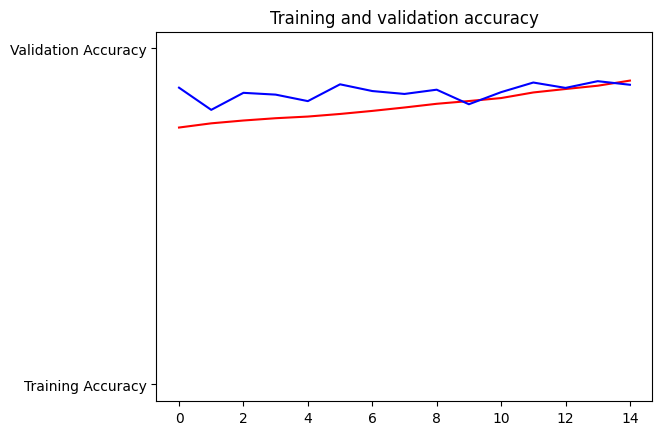

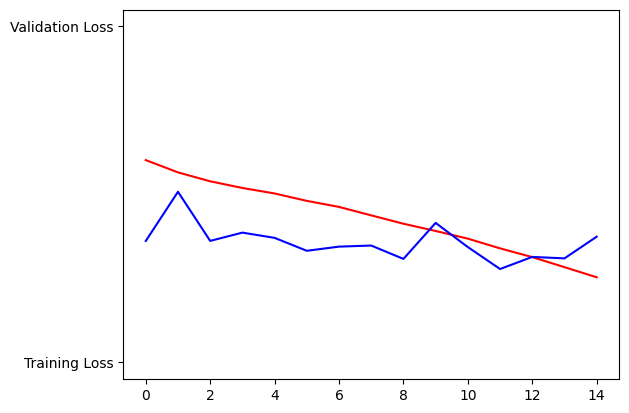

<Figure size 640x480 with 0 Axes>

In [8]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()